In [1]:
import pandas as pd
import random
import itertools
import datetime as dt
import matplotlib.pyplot as plt
import calendar
import numpy as np

In [134]:
import seaborn as sns

Downloaded data from: http://web.mta.info/developers/turnstile.html

Documentations at: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

Map of the MTA system: http://web.mta.info/maps/submap.html

In [2]:
df = pd.read_csv('clean_turnstile_data.csv')

/Users/kendra/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637417 entries, 0 to 637416
Data columns (total 16 columns):
Unnamed: 0     637417 non-null int64
C/A            637417 non-null object
UNIT           637417 non-null object
SCP            637417 non-null object
STATION        637417 non-null object
LINENAME       637417 non-null object
DIVISION       637417 non-null object
DATE           637417 non-null object
TIME           637417 non-null object
DESC           637417 non-null object
ENTRIES        637417 non-null int64
EXITS          637417 non-null int64
DATETIME       637417 non-null object
STATION_KEY    637417 non-null object
ENTRY_DIFFS    637417 non-null float64
EXIT_DIFFS     637417 non-null float64
dtypes: float64(2), int64(3), object(11)
memory usage: 77.8+ MB


In [73]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%Y-%m-%d %H:%M:%S')
df['DATE'] = pd.to_datetime(df['DATE'])

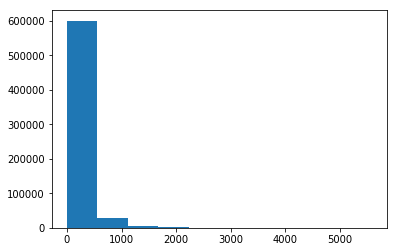

In [7]:
plt.hist(df['EXIT_DIFFS'].dropna());

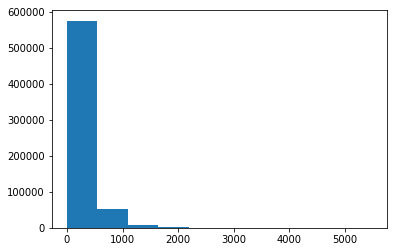

In [9]:
plt.hist(df['ENTRY_DIFFS'].dropna());

Groupy by Station & Date, sum over Entry & Exit Diffs

In [74]:
grp1 = df.groupby(['STATION', 'DATE'])['ENTRY_DIFFS','EXIT_DIFFS'].sum().reset_index()

In [75]:
grp1.to_csv('turnstile_data_by-station-day.csv')

Total Volume by Station:

In [27]:
grp2 = grp1.drop(columns=['DATE']).groupby('STATION').sum()

Highest volume stations:

In [55]:
exit_high = list(grp2.sort_values('EXIT_DIFFS').tail(15).index)
entry_high = list(grp2.sort_values('ENTRY_DIFFS').tail(15).index)
highest_vol = set(exit_high + entry_high)

In [56]:
len(highest_vol)

16

In [61]:
grp1.head()

,STATION,DATE,ENTRY_DIFFS,EXIT_DIFFS
0,1 AV,2018-05-19 00:00:00,19241.0,21979.0
1,1 AV,2018-05-20 00:00:00,15258.0,16773.0
2,1 AV,2018-05-21 00:00:00,21686.0,23663.0
3,1 AV,2018-05-22 00:00:00,22712.0,25362.0
4,1 AV,2018-05-23 00:00:00,23654.0,25091.0


In [63]:
s = grp1.loc[50,'STATION']
dum_df = grp1[grp1['STATION'] == s]

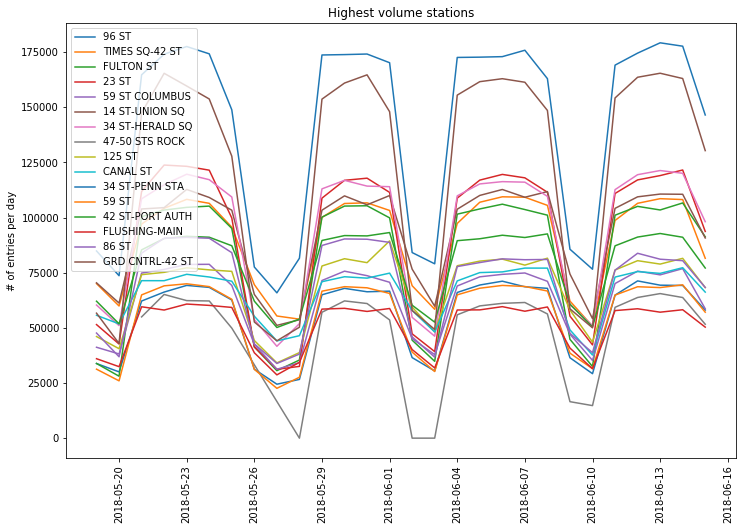

In [76]:
fig, ax = plt.subplots(figsize=[12,8])

for s in highest_vol:
    dum_df = grp1[grp1['STATION'] == s]
    xs = dum_df['DATE']
#     week_start = xs.iloc[0].strftime('%Y-%m-%d')
    plt.plot(xs, dum_df['ENTRY_DIFFS'], label=s)
#     xticklocs = ax.get_xticks()
#     plt.xticks(xticklocs, x_labels)
    plt.xticks(rotation=90)
    plt.legend()
    plt.ylabel('# of entries per day')
    plt.title('Highest volume stations');

In [70]:
grp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10375 entries, 0 to 10374
Data columns (total 4 columns):
STATION        10375 non-null object
DATE           10375 non-null object
ENTRY_DIFFS    10375 non-null float64
EXIT_DIFFS     10375 non-null float64
dtypes: float64(2), object(2)
memory usage: 324.3+ KB


In [78]:
grp1['DAY_OF_WEEK'] = grp1['DATE'].dt.weekday

In [79]:
grp1.head()

,STATION,DATE,ENTRY_DIFFS,EXIT_DIFFS,DAY_OF_WEEK
0,1 AV,2018-05-19,19241.0,21979.0,5
1,1 AV,2018-05-20,15258.0,16773.0,6
2,1 AV,2018-05-21,21686.0,23663.0,0
3,1 AV,2018-05-22,22712.0,25362.0,1
4,1 AV,2018-05-23,23654.0,25091.0,2


In [82]:
grp3 = grp1.groupby(['STATION','DAY_OF_WEEK'])['ENTRY_DIFFS','EXIT_DIFFS'].mean().reset_index()

In [83]:
grp3.head()

,STATION,DAY_OF_WEEK,ENTRY_DIFFS,EXIT_DIFFS
0,1 AV,0,19392.75,21233.00
1,1 AV,1,21936.50,24120.00
2,1 AV,2,23209.50,24812.75
3,1 AV,3,23073.00,24904.25
4,1 AV,4,22599.00,24406.50


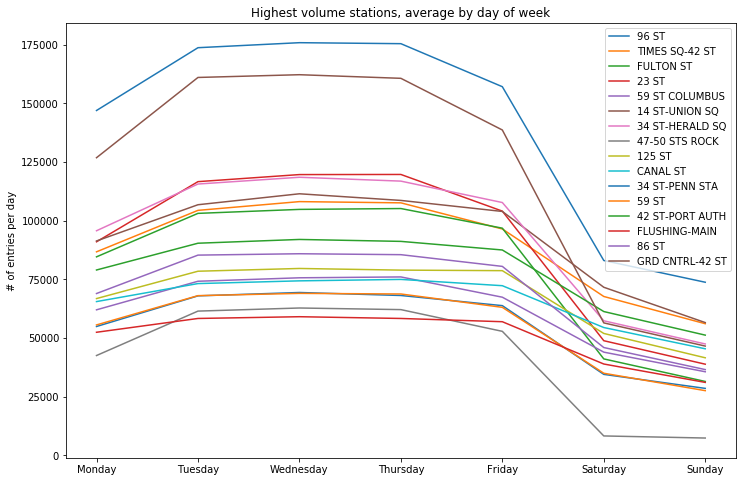

In [86]:
fig, ax = plt.subplots(figsize=[12,8])
x_labels = calendar.day_name[:]

for s in highest_vol:
    dum_df = grp3[grp3['STATION'] == s]
    xs = dum_df['DAY_OF_WEEK']
#     week_start = xs.iloc[0].strftime('%Y-%m-%d')
    plt.plot(xs, dum_df['ENTRY_DIFFS'], label=s)
    
xticklocs = ax.get_xticks()
plt.xticks(np.arange(7), x_labels)
plt.legend()
plt.ylabel('avg # of entries per day')
plt.title('Highest volume stations, average by day of week');

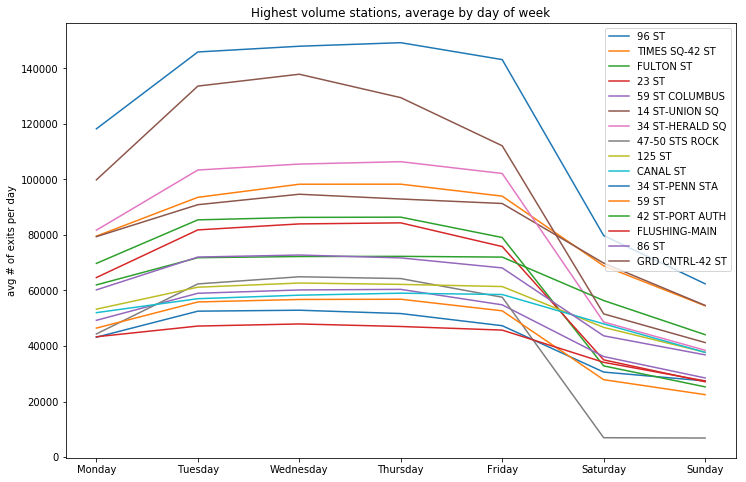

In [87]:
fig, ax = plt.subplots(figsize=[12,8])
x_labels = calendar.day_name[:]

for s in highest_vol:
    dum_df = grp3[grp3['STATION'] == s]
    xs = dum_df['DAY_OF_WEEK']
#     week_start = xs.iloc[0].strftime('%Y-%m-%d')
    plt.plot(xs, dum_df['EXIT_DIFFS'], label=s)
    
xticklocs = ax.get_xticks()
plt.xticks(np.arange(7), x_labels)
plt.legend()
plt.ylabel('avg # of exits per day')
plt.title('Highest volume stations, average by day of week');

**Next steps:** 
- determine what we want our "weekday vs weekend" cut-off to be. 
- plot a heatmap of a few of these stations (GRD CENTRAL, ASTORIA DITMARS, e.g.)

In [109]:
def get_station_data(s):
    '''Given station key ,
    returns all entries from original data frame for this station '''
    return df[df['STATION'] == s]

In [114]:
def heatmap_data_by_day(s, data_col, year, month, day):
    '''Given:
        station key s 
        data_col (e.g. 'ENTRY_DIFFS')
        date: year, month, day
    Returns 
        Dataframe summed over that date, for that station, from that data_col'''
    d = dt.datetime(year, month, day)
    dum_df = df[(df['DATE'] == d) & (df['STATION'] == s)]
    return dum_df.groupby('DATETIME')[data_col].sum()

In [161]:
# index 1 = a station that doesn't have neat 0, 4, 8, 12:00 timepoints for 5/19/18
# same with index 2
test_key = list(highest_vol)[2:3][0]


In [162]:
s = test_key
d = dt.datetime(2018, 5, 19)
dum_df = df[(df['DATE'] == d) & (df['STATION'] == s)]

In [164]:
heatmap_data_by_day(s, 'ENTRY_DIFFS', 2018, 5, 19)

DATETIME
2018-05-19 00:00:00     159.0
2018-05-19 01:00:00     583.0
2018-05-19 03:00:00     137.0
2018-05-19 04:00:00     178.0
2018-05-19 05:00:00    1101.0
2018-05-19 07:00:00     917.0
2018-05-19 08:00:00     667.0
2018-05-19 09:00:00    3719.0
2018-05-19 11:00:00    2056.0
2018-05-19 12:00:00    1105.0
2018-05-19 13:00:00    7966.0
2018-05-19 15:00:00    2284.0
2018-05-19 16:00:00    1217.0
2018-05-19 17:00:00    6578.0
2018-05-19 19:00:00    1207.0
2018-05-19 20:00:00     774.0
2018-05-19 21:00:00    2782.0
2018-05-19 23:00:00     431.0
Name: ENTRY_DIFFS, dtype: float64

In [166]:
hm_data = [heatmap_data_by_day(s, 'ENTRY_DIFFS', 2018, 5, d) for d in range(19,26)]
# gc_hmdat

In [167]:
hm_data

[DATETIME
 2018-05-19 00:00:00     159.0
 2018-05-19 01:00:00     583.0
 2018-05-19 03:00:00     137.0
 2018-05-19 04:00:00     178.0
 2018-05-19 05:00:00    1101.0
 2018-05-19 07:00:00     917.0
 2018-05-19 08:00:00     667.0
 2018-05-19 09:00:00    3719.0
 2018-05-19 11:00:00    2056.0
 2018-05-19 12:00:00    1105.0
 2018-05-19 13:00:00    7966.0
 2018-05-19 15:00:00    2284.0
 2018-05-19 16:00:00    1217.0
 2018-05-19 17:00:00    6578.0
 2018-05-19 19:00:00    1207.0
 2018-05-19 20:00:00     774.0
 2018-05-19 21:00:00    2782.0
 2018-05-19 23:00:00     431.0
 Name: ENTRY_DIFFS, dtype: float64, DATETIME
 2018-05-20 00:00:00     153.0
 2018-05-20 01:00:00     300.0
 2018-05-20 03:00:00      88.0
 2018-05-20 04:00:00      87.0
 2018-05-20 05:00:00     603.0
 2018-05-20 07:00:00     757.0
 2018-05-20 08:00:00     435.0
 2018-05-20 09:00:00    2784.0
 2018-05-20 11:00:00    1592.0
 2018-05-20 12:00:00    1023.0
 2018-05-20 13:00:00    6233.0
 2018-05-20 15:00:00    2105.0
 2018-05-20 16:

In [144]:
for i in hm_data:
    print(len(i))

6
6
6
6
6
6
7


In [156]:
hm_data[-1]

DATETIME
2018-05-25 00:00:00     4600.0
2018-05-25 04:00:00     4958.0
2018-05-25 08:00:00    12380.0
2018-05-25 12:00:00    22523.0
2018-05-25 14:13:15     2519.0
2018-05-25 16:00:00    26950.0
2018-05-25 20:00:00    21736.0
Name: ENTRY_DIFFS, dtype: float64

In [158]:
hm_data[-1][4]

2519.0

In [150]:
hm_data[-1][:4] + hm_data[-1][5:]

DATETIME
2018-05-25 00:00:00   NaN
2018-05-25 04:00:00   NaN
2018-05-25 08:00:00   NaN
2018-05-25 12:00:00   NaN
2018-05-25 16:00:00   NaN
2018-05-25 20:00:00   NaN
Name: ENTRY_DIFFS, dtype: float64

In [141]:
sns.heatmap(hm_data)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
for x in gc_hmdata:
    print(len(x))

In [ ]:
gc_hmdata[:20]

In [ ]:
dum = 